In [1]:
import glob
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from matplotlib.pyplot import specgram
%matplotlib inline

In [2]:
DATA_DIR=os.environ['DATA_DIR']

In [3]:
def load_sound_files(file_paths, max_time=None):
    raw_sounds = []
    for fp in file_paths:
        if max_time is not None:
            X,sr = librosa.load(fp, duration=max_time)
        else:
            X,sr = librosa.load(fp)
        print("sound shape:")
        print(X.shape)
        print("sample rate:")
        print(sr)
        raw_sounds.append(X)
    return raw_sounds

def plot_waves(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        librosa.display.waveplot(np.array(f),sr=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 1: Waveplot",x=0.5, y=0.915,fontsize=18)
    plt.show()
    
def plot_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        specgram(np.array(f), Fs=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 2: Spectrogram",x=0.5, y=0.915,fontsize=18)
    plt.show()

def plot_log_power_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        D = librosa.logamplitude(np.abs(librosa.stft(f))**2, ref_power=np.max)
        librosa.display.specshow(D,x_axis='time' ,y_axis='log')
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 3: Log power spectrogram",x=0.5, y=0.915,fontsize=18)
    plt.show()

In [4]:
sound_file_paths = ["%s/ES2016a/audio/ES2016a.Mix-Headset.wav" % DATA_DIR,
                    "%s/ES2016a/audio/ES2016a.Headset-0.wav" % DATA_DIR]
sound_name = ["mix", "single_person"]
raw_sounds = load_sound_files(sound_file_paths, max_time=1.0)

sound shape:
(22050,)
sample rate:
22050
sound shape:
(22050,)
sample rate:
22050


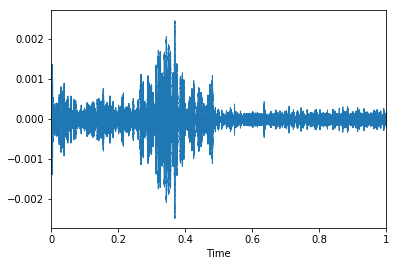

In [5]:
fig = plt.figure()
librosa.display.waveplot(np.array(raw_sounds[0]))

(1025, 44)


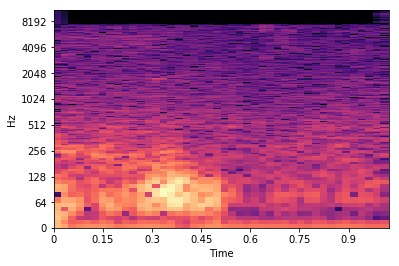

In [6]:
fig = plt.figure()
D = librosa.logamplitude(np.abs(librosa.stft(raw_sounds[0]))**2, ref_power=np.max)
print(D.shape)
librosa.display.specshow(D,x_axis='time' ,y_axis='log')


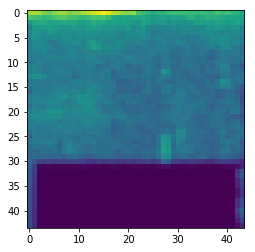

In [7]:
new_D = scipy.misc.imresize(D, (44,44))

fig = plt.figure()
plt.imshow(new_D)